# D213 - Advanced Data Analytics
### NLM3 Task 2: Sentiment Analysis Using Neural Networks
#### Advanced Data Analytics — D213
#### PRFA — NLM3
> André Davis
> StudentID: 010630641
> MSDA
>
> Competencies
> 4030.7.1 : Constructing Neural Networks
> The graduate builds neural networks in the context of machine-learning modeling.
> 
> 4030.7.3 : Natural Language Processing
> The graduate extracts insights from text data using effective and appropriate natural language processing (NLP) models.

##### Table of Contents

 <ul>
    <li><a href="#documentation">Documentation</a></li>
    <li><a href="#research-question">A1: Research Question</a></li>
    <li><a href="#objectives">A2: Objectives Or Goals</a></li>
    <li><a href="#neural-networks-identification">A3: Prescribed Network Neural Network Identification</a></li>
    <li><a href="#data-exploration">B1: Data Exploration</a></li>
    <li><a href="#tokenization-process">B2: Tokenization</a></li>
    <li><a href="#padding-process">B3: Padding Process</a></li> 
    <li><a href="#categories-of-sentiment">B4: Categories Of Sentiment</a></li>
    <li><a href="#data-preparation">B5: Steps To Prepare the Data</a></li>
    <li><a href="#copy-of-prepared-data">B6: Prepared Dataset</a></li>
    <li><a href="#tensorflow-model-summary">C1: Model Summary</a></li>
    <li><a href="#network-architecture">C2: Network Architecture</a></li>
    <li><a href="#hyperparameters">C3: Hyperparameters</a></li>
    <li><a href="#stopping-criteria">D1: Stopping Criteria</a></li>
    <li><a href="#fitness">D2: Fitness</a></li>
    <li><a href="#training-process">D3: Training Process</a></li>
    <li><a href="#predictive-accuracy">D4: Predictive Accuracy</a></li>
    <li><a href="#source-code">E: Code</a></li> 
    <li><a href="#functionality">H: Functionality</a></li> 
    <li><a href="#recommendations">G: Recommendeds</a></li>
    <li><a href="#reporting">H: Reporting</a></li>
    <li><a href="#code-references">I: Sources for Thirday Party Code</a></li>
    <li><a href="#source-references">J: Source References</a></li>    
  </ul>

# Documentation

 * [TensorFlow](https://www.tensorflow.org/)
 * [Keras](https://keras.io/)
     * [Dot Products](https://www.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/x786f2022:vectors-and-matrices/a/dot-products-mvc)    

## Package Installs

In [464]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow==2.14.0
!pip install emoji
!pip install unidecode


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Python Package Imports

In [465]:
import pandas as pd
import matplotlib.pyplot as plt

from typing import Tuple
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#Unusual Character Checks
import emoji
from unidecode import unidecode

#Tensor-Flow Configuration
import tensorflow as tf
from keras.layers import Dense, Input, TextVectorization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.callbacks import History



print(f'TensorFlow Version: {tf.__version__}')
print('\n\n')

TensorFlow Version: 2.14.0




## Custom Python Functions

In [466]:
'''
Custom Utility functions for later activities
'''

def nameof(obj:any, g:dict=globals()) -> str:
    """
    :param obj: Any object that we want to return the string name of
    :type obj: any
     
    :param g: dictionary of globally accessible objects
    :type g: dict
    
    :return: a string representation of the objects name
    """
    return [name for name in g if g[name] is obj][0]

#test nameof function
assert nameof(mean_squared_error) ==  'mean_squared_error', 'nameof function should be returning the name of the object'

def nlp_data_split(data: pd.DataFrame
                   ,train_percentage:float=.8
                   ,validate_percentage:float=.1
                   ,test_percentage:float=.1) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    :param data: Data to be split for NLP processing
    :type data: pd.DataFrame 
    
    :param train_percentage: Percentage of data to use as model training data
    :type train_percentage: float
         
    :param validate_percentage: Percentage of data to use as model validation data
    :type validate_percentage: float
    
     
    :param test_percentage: Percentage of data to use as model testing data
    :type test_percentage: float
     
    :return: Tuple of pd.DataFrames broken into training, validation, and test data-frames.
    """

    assert (train_percentage + validate_percentage + test_percentage) == 1, 'Percentages must equal 1 (100%)'

    train, left_over = train_test_split(data, train_size=train_percentage, test_size=(validate_percentage + test_percentage))
    validate, test = train_test_split(left_over, train_size=.5, test_size=.5)

    return train, validate, test

def unusual_character_check(data: pd.DataFrame, column: str) -> bool:
    """
    :param data: Data to search for emojis and non-english characters
    :type data: pd.DataFrame
    
    :param column: Column of Data to check
    :type column: str    
     
    :return: list of unusual characters found
    """

    def check(text):
        if emoji.is_emoji(text) or unidecode(text) != text:
            return text
        else:
            return None

    results = pd.DataFrame()
    results['ContainsUnusual'] = data[column].apply(check)
    return results['ContainsUnusual'].isna().all()

def plot_accuracy_metrics(model_history:History, fig_size:tuple=(14,6)) -> None:
    """
    :param model_history: Sequence Model History (Accuracy Metrics)
    :type model_history:
     
    :param fig_size:
    :type fig_size: tuple
     
    :return: None
    """
    legend_labels = ['Training', 'Validation']
    title_template = 'Training Dataset vs. Validation Dataset ({})'
    
    _, (accuracy_axes, loss_axes) = plt.subplots(1, 2, figsize=fig_size)
    
    accuracy_axes.set_title(title_template.format('Accuracy'))
    accuracy_axes.set_xlabel('Epoch')
    accuracy_axes.set_ylabel('Accuracy')
    accuracy_axes.plot(model_history['loss'], label=legend_labels[0])
    accuracy_axes.plot(model_history['val_loss'], label=legend_labels[1])
    accuracy_axes.legend(legend_labels)
    
    loss_axes.set_title(title_template.format('Loss'))
    loss_axes.set_xlabel('Epoch')
    loss_axes.set_ylabel('Loss')
    loss_axes.plot(model_history['loss'], label=legend_labels[0])
    loss_axes.plot(model_history['val_loss'], label=legend_labels[1])
    loss_axes.legend(legend_labels)
    
    plt.tight_layout()
    plt.show()

<a id="research-question"></a>
# A1: Research Question

Is it feasible to ascertain the sentiment polarity—whether positive or negative—of a Review to a reasonably reliable extent, solely based on the textual content of the review?

<a id="objectives"></a>
# A2: Objectives and Goals of Analysis

The main goal of this analysis is to build a neural network model that can fairly accurately tell if a review is positive or negative based on its text. A secondary goal is to try out different neural network setups and settings to find which one works best for our data and aim.

<a id="neural-networks-identification"></a>
# A3: Prescribed Network Neural Network Identification

> Identify an industry-relevant type of neural network that can be trained to produce useful text classification predictions on text sequences on the selected data set.

There are quite a few text-classification neural networks that can be used. Because this is a `WGU Performance Assessment` and most personal laptops don't have the computing power to perform some of the more complex neural networks without advanced GPU support [`Feedforward Neural Networks (FNN)`](https://en.wikipedia.org/wiki/Feedforward_neural_network). This is an advanced topic, and this particular neural network is known for its simplicity to implement and ability to function without higher end hardware.

It must be noted that because of its simplicity and low-resource needs, it does come with some limitations, which include:

1. Loss of neighborhood information (Suman, 2020)
2. More parameters to optimize (Suman, 2020)
3. It's not Translation invariance (Suman, 2020)

The limitations stemming from the lack of awareness regarding neighboring information preclude Feedforward Neural Networks (FNN) from effectively identifying patterns in data structures such as images, where understanding the relationship between neighboring pixels is crucial. However, in the context of text analysis for performance assessment, these limitations are not particularly detrimental.

<a id="data-exploration"></a>
# B1: Exploratory Data Analysis

> Perform exploratory data analysis on the chosen data set, and include an explanation of each of the following elements:
> * presence of unusual characters (e.g., emojis, non-English characters)
> * vocabulary size
> * proposed word embedding length
> * statistical justification for the chosen maximum sequence length

In [467]:
'''
File format as presented in the readme.txt:

=======
Format:
=======
sentence \t score \n


=======
Details:
=======
Score is either 1 (for positive) or 0 (for negative)
'''
review_columns = ['review', 'sentiment_score']

imdb_reviews = pd.read_csv('./imdb_labelled.txt', engine='python', sep='\t+', header=None, names=review_columns)
amazon_reviews = pd.read_csv('./amazon_cells_labelled.txt', engine='python', sep='\t+', header=None, names=review_columns)
yelp_reviews = pd.read_csv('./yelp_labelled.txt', engine='python', sep='\t+', header=None, names=review_columns)


In [468]:
print(imdb_reviews.info())
print('\n')
print(amazon_reviews.info())
print('\n')
print(yelp_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           1000 non-null   object
 1   sentiment_score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           1000 non-null   object
 1   sentiment_score  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           1000 non-null   object
 1   sentiment_score  1000 non-null   int64 
dtypes: int64(1), object(1)
m

In [469]:
'''
Merge Datasets into one
'''

merged_reviews = pd.concat([imdb_reviews, amazon_reviews, yelp_reviews], ignore_index=True)

In [470]:
print(merged_reviews.value_counts())

review                                                                                              sentiment_score
This is a great deal.                                                                               1                  2
Works great.                                                                                        1                  2
Not recommended.                                                                                    0                  2
I won't be back.                                                                                    0                  2
I love this place.                                                                                  1                  2
                                                                                                                      ..
I rather enjoyed it.                                                                                1                  1
I really do recommend this place, you

In [471]:
'''
readme.txt states that the data should contain 500 positive and 500 negative sentences, a 50/50 split.

All 3 UC-Irvine datasets have been loaded and merged into one dataset.

Verifying dataset is complete
'''

total_positive_sentiments = len(merged_reviews[merged_reviews['sentiment_score'] == 1])
total_negative_sentiments = len(merged_reviews[merged_reviews['sentiment_score'] == 0])

print(f'Positive Sentiments Loaded: {total_positive_sentiments}')
print(f'Negative Sentiments Loaded: {total_negative_sentiments}')

assert total_positive_sentiments == 1500, 'Failed to load all the positive sentiment scores'
assert total_negative_sentiments == 1500, 'Failed to load all the negative sentiment scores'


Positive Sentiments Loaded: 1500
Negative Sentiments Loaded: 1500


In [472]:
'''
Check for missing values
'''
missing_data_check = merged_reviews.isna().sum()

assert missing_data_check.review == 0, 'Reviews should not contain an missing data'
assert missing_data_check.sentiment_score == 0, 'Sentiment Scores should not contain any missing data'

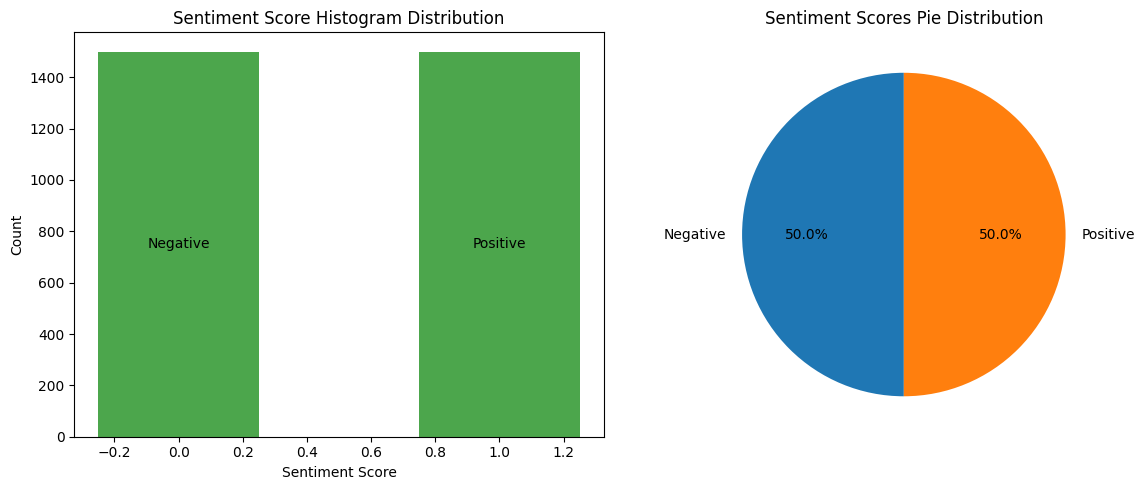

In [473]:
'''
Chart Distribution of Sentiment Score to visually check 50/50 dataset assumption.
'''

sentiment_counts = [total_negative_sentiments, total_positive_sentiments]

_, (hist_axes, pie_axis) = plt.subplots(1, 2, figsize=(12, 5))

hist_axes.hist(merged_reviews['sentiment_score'], bins=[-.5, .5, 1.5], rwidth=.5, color='green', alpha=.7)
hist_axes.set_xlabel('Sentiment Score')
hist_axes.set_ylabel('Count')
hist_axes.set_title('Sentiment Score Histogram Distribution')

for index, sentiment_count in enumerate(sentiment_counts):
    hist_axes.text(index, (sentiment_count / 2), 'Negative' if index == 0 else 'Positive', color='black', ha='center', va='center')

pie_axis.pie(sentiment_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
pie_axis.set_title('Sentiment Scores Pie Distribution')

plt.tight_layout()
plt.show()

### Presence of unusual characters (e.g., emojis, non-English characters)

In [474]:
'''
Check for Unusual Characters
'''

contains_unusual = unusual_character_check(merged_reviews, review_columns[0])
print(f'Dataset contains unusual characters such as Emojis or Non-English characters: [{contains_unusual}]')

Dataset contains unusual characters such as Emojis or Non-English characters: [False]


### Vocabulary Size

Please see section B2 where the Tokenization process will expose the Vocabulary Size.

Results will be printed to screen in format: *'The Reviews dataset contains a vocabulary size of [n] based on the 80% training dataset.'*

### Proposed Word Embedding Length

The recommended embedding size is set at *100*. Typically, the dimensionality of an embedding is influenced by available computational resources and the nature of the data. Given that we are conducting a performance review on a concise dataset comprising 1,000 entries, extensive computational power isn't necessary. Furthermore, the specificity of the data to reviews justifies this choice.

### Statistical justification for the chosen maximum sequence length

# FILL THIS IN

<a id="tokenization-process"></a>
# B2: Tokenization

"Tokenization is the process of breaking down a piece of text into small units called tokens. A token may be a word, part of a word or just characters like punctuation." (Perry, n.d.). For a simple example, we could end up with a text containing *"Rick and Morty go on adventures."* Then during the tokenization process ('chunking') we would potentially end up with a collection of tokens such as:

1. Rick
2. and
3. Morty
4. go
5. on
6. adventures
7. .

Take notice that the period (.) became a token as well. In the vectorization process, sometimes a text is standardized where punctuation and casing are removed.

There are many different libraries and ways to perform tokenization such as [`Natural Language Toolkit - NLTK`](https://www.nltk.org/). For the purposes of this performance assessment the [`Keras`](https://keras.io/) [`TextVectorization`](https://keras.io/api/layers/preprocessing_layers/core_preprocessing_layers/text_vectorization/) will be used.

In [475]:
'''
Split the Reviews into 80% training data 10% validation data, and 10% test data.
'''
train_reviews, validation_reviews, testing_reviews = nlp_data_split(merged_reviews)

embedding_padding_length = 100

training_reviews_feature = train_reviews[review_columns[0]]

text_vectorizer = TextVectorization(max_tokens=5000, output_sequence_length=embedding_padding_length, standardize='lower_and_strip_punctuation')
text_vectorizer.adapt(training_reviews_feature)

trained_vocabulary_size = text_vectorizer.vocabulary_size()
trained_vocabulary = text_vectorizer.get_vocabulary()

unique_vocabulary = set(trained_vocabulary)
assert len(unique_vocabulary) == len(trained_vocabulary), 'Should be no duplicates'

trained_tokens_df = pd.DataFrame({
    'Tokens': trained_vocabulary
})

b1_vocabulary_size = f'''
The Reviews dataset contains a vocabulary size of [{trained_vocabulary_size}] based on the 80% training dataset.
'''
print(b1_vocabulary_size)



The Reviews dataset contains a vocabulary size of [4650] based on the 80% training dataset.


<a id="padding-process"></a>
# B3: Padding Process

In the machine learning realm, there are many models that require consistent length inputs. Padding is pre-processing step where adding extra values (usually zeros) to data to make them all the same size. This is done because many machine learning models require consistent input sizes. For example, in processing text, if we have sentences of different lengths but our model expects all sentences to have the same number of words, we add extra "empty" words to shorter sentences until they match the length of the longest one. This ensures the model can handle all the data uniformly.

This Performance Assessment is using the [`Keras TextVectorization`](https://keras.io/api/layers/preprocessing_layers/core_preprocessing_layers/text_vectorization/) function. It includes a parameter `output_sequence_length`, which will add padding when items are too short and truncate when items are too long. Below is verification of padding based on the previous example text of *"Rick and Morty go on adventures."*

In [476]:
verification_review = 'This was a flick doomed from its conception.'
verification_review_vectors = text_vectorizer([verification_review])

validation_reviews_tokens = list()
for i in verification_review_vectors[0]:
    validation_reviews_tokens.append(trained_vocabulary[i])

verification_message = f'''
Mock Text: {verification_review}
Tokens: {validation_reviews_tokens}
Embeddings: {verification_review_vectors}
'''
print(verification_message)

assert len(verification_review) < len(verification_review_vectors[0]), f'Failed padding process to make all vectors (embeddings) an equal size of {embedding_padding_length}'
assert len(verification_review_vectors[0]) == embedding_padding_length, f'The text [{verification_review}] should have had its vector padded to {embedding_padding_length}'


Mock Text: This was a flick doomed from its conception.
Tokens: ['this', 'was', 'a', 'flick', 'doomed', 'from', 'its', 'conception', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
Embeddings: [[   9   11    4  596 3917   45   32 4134    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   

<a id="categories-of-sentiment"></a>
# B4: Categories Of Sentiment

The **Categories of Sentiment** for the [`imdb_labelled dataset`](https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences) is Binary Sentiment Classification as there are only two possible classifications. The classification categories are 1—Positive or 0—Negative. Demonstrated in the below code.

In [477]:
sentiment_scores = merged_reviews[review_columns[1]]

total_categories_of_sentiment = sentiment_scores.nunique()
available_categories_of_sentiment = list(sentiment_scores.value_counts().index)

assert total_categories_of_sentiment == 2, 'The total categories of sentiment should have been 2 as the IMDB reviews are either positive or negative'
assert available_categories_of_sentiment == [0, 1], 'Category values should only include 0 or 1, representing Negative or Positive'

sentiment_score_label = {
    0: 'Negative',
    1: 'Positive'
}
 
categories_of_sentiment_summary = f'''
Total Categories of Sentiment: {total_categories_of_sentiment}
Available Categories of Sentiment: {available_categories_of_sentiment}

Legend: 
 0 - {sentiment_score_label.get(0)}
 1 - {sentiment_score_label.get(1)}   
'''

print(categories_of_sentiment_summary)



Total Categories of Sentiment: 2
Available Categories of Sentiment: [0, 1]

Legend: 
 0 - Negative
 1 - Positive   


<a id="data-preparation"></a>
# B5: Steps To Prepare the Data
>Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split (based on the industry average).

The dataset that is being used is in a `.txt` format. Which in the `readme.txt` supplied from the [`UC Irvine Machine Learning Repository`](https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences) indicates that the file is formatted as *sentence \t score \n*.

Data Preparation Steps:
1. Load the `.txt` files with Pandas function [`.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) with settings based on the `readme.txt` file format. Data is separated by a tab, and each data entry is on a new-line.
2. Merge data sets (imdb, amazon, and yelp)
3. Use custom function `nlp_data_split` to split the data into training, validation, and testing datasets.
    * Industry standard for NLP splits is:
        * Training -> 80%
        * Validation -> 10%
        * Testing -> 10%
4. Tokenize Training Data

NLP Split Verification Code:

In [478]:
'''
Verify Raw Text Reviews have been properly split for NLP.
'''

#original data
total_data_count = len(merged_reviews)

#split data
training_data_count = len(train_reviews)
validation_data_count = len(validation_reviews)
testing_data_count = len(testing_reviews)

training_percentage = training_data_count/total_data_count 
assert training_percentage == .8, f'Training data should be 80% of original data, received [{training_percentage}]'

validation_percentage = validation_data_count/total_data_count
assert validation_percentage == .1, f'Validation data should be 10% of original data, received [{validation_percentage}]'

testing_percentage = testing_data_count/total_data_count
assert testing_percentage == .1, f'Testing data should be 10% of original data, received [{testing_percentage}]'

<a id="copy-of-prepared-data"></a>
# B6: Prepared Dataset

In [479]:
'''
Save to CSV IMDB Reviews Data Sets for NLP split into Training, Validation, and Test
'''
train_reviews.to_csv('./merged-reviews-training-dataset.csv')
validation_reviews.to_csv('./merged-reviews-validation-dataset.csv')
testing_reviews.to_csv('./merged-reviews-testing-dataset.csv')

'''
Tokenized IMDB Reviews based on Training Dataset
'''
trained_tokens_df.to_csv('./merged-reviews-training-dataset-tokenized.csv', index=False)

<a id="tensorflow-model-summary"></a>
# C1: Model Summary
>The submission provides the complete output of the model summary of the function from TensorFlow. The output aligns with the type of network used.

In [480]:
#Initialize Sequential Model
sequential_model = Sequential([
    #Add Embedding (Vectorization) Layer with check for Input 1Dness
    Input(shape=(1,), dtype=tf.string),
    text_vectorizer,
    
    #There is no definitive formula that can specify the exact architecture for a neural network that will work best for a given dataset. Experimenting
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

'''
Loss Function: BinaryCrossentropy
Description: Computes the cross-entropy loss between true labels and predicted labels.
Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
'''

loss_function = BinaryCrossentropy()

sequential_model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
sequential_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_23 (Tex  (None, 100)               0         
 tVectorization)                                                 
                                                                 
 dense_72 (Dense)            (None, 32)                3232      
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [481]:
'''
Train the Sequential Model
'''

x_train_reviews = train_reviews[review_columns[0]]
y_train_sentiment_scores = train_reviews[review_columns[1]]

x_validation_reviews = validation_reviews[review_columns[0]]
y_validation_sentiment_scores = validation_reviews[review_columns[1]]

#Actually train the model.
model_results = sequential_model.fit(x=x_train_reviews
                              ,y=y_train_sentiment_scores
                              ,validation_data=(x_validation_reviews, y_validation_sentiment_scores)
                              ,epochs=50)



Epoch 1/50
75/75 [==============================] - 3s 31ms/step - loss: 124.3561 - accuracy: 0.4963 - val_loss: 53.3064 - val_accuracy: 0.5267
Epoch 2/50
75/75 [==============================] - 0s 2ms/step - loss: 44.8028 - accuracy: 0.5258 - val_loss: 32.0058 - val_accuracy: 0.4733
Epoch 3/50
75/75 [==============================] - 0s 3ms/step - loss: 31.3224 - accuracy: 0.5275 - val_loss: 26.6632 - val_accuracy: 0.4467
Epoch 4/50
75/75 [==============================] - 0s 2ms/step - loss: 25.4760 - accuracy: 0.5358 - val_loss: 24.3609 - val_accuracy: 0.4767
Epoch 5/50
75/75 [==============================] - 0s 3ms/step - loss: 21.3379 - accuracy: 0.5379 - val_loss: 25.2992 - val_accuracy: 0.4633
Epoch 6/50
75/75 [==============================] - 0s 2ms/step - loss: 18.1549 - accuracy: 0.5450 - val_loss: 23.3413 - val_accuracy: 0.4700
Epoch 7/50
75/75 [==============================] - 0s 2ms/step - loss: 14.9590 - accuracy: 0.5617 - val_loss: 20.3656 - val_accuracy: 0.4867
Epoc

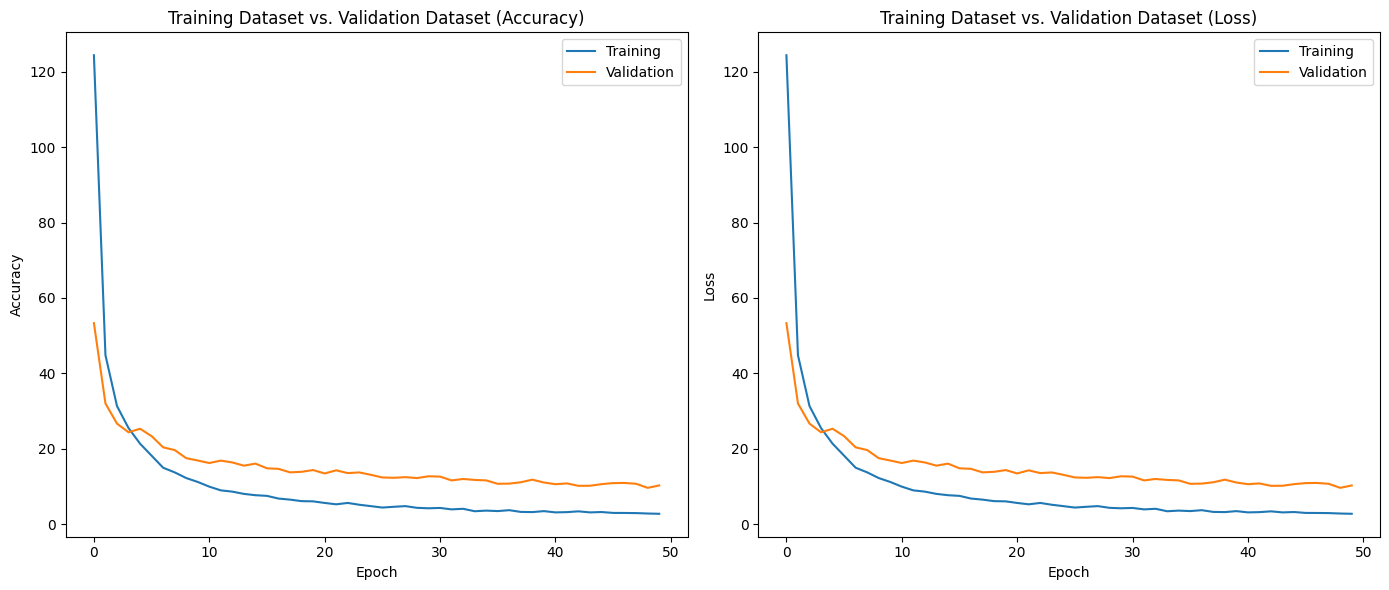

In [482]:
'''
Chart Accuracy and Lost Metrics
'''

plot_accuracy_metrics(model_results.history)

<a id="network-architecture"></a>
# C2: Network Architecture
>The submission completely and accurately discusses the number of layers, the type of layers, and the total number of parameters in the network.

<a id="hyperparameters"></a>
# C3: Hyperparameters
>The submission logically justifies the choice of hyperparameters, including each of the 6 listed elements, and each element aligns with the network used.


<a id="stopping-criteria"></a>
# D1: Stopping Criteria
>The submission accurately discusses the impact of using stopping criteria to include defining the number of epochs. A screenshot showing the final training epoch is provided.

<a id="fitness"></a>
# D2: Fitness
>The submission completely and accurately assesses the fitness of the model, and the assessment includes any actions taken to address overfitting.

<a id="training-process"></a>
# D3: Training Process
>The submission provides complete visualizations of the model’s training process, including a line graph of the loss and the chosen evaluation metric. The visualizations are clearly labeled and align with the model’s training process.

<a id="predictive-accuracy"></a>
# D4: Predictive Accuracy
>The submission discusses the predictive accuracy of the trained network using the chosen evaluation metric from part D3.

<a id="source-code"></a>
# E: Code

##### NOTE: This Jupyter Notebook (`.ipynb`) is acting as the Paper and Code together. Please review the notebook for all sections of appropriate code.

<a id="functionality"></a>
# H: Functionality
>The submission accurately discusses the functionality of the neural network, including the impact of the network architecture. The discussion aligns with the research question from part A.

<a id="recommendations"></a>
# G: Recommendations
>The submission recommends an appropriate course of action based on the results as they relate to the research question.

<a id="reporting"></a>
# H: Reporting
>The neural network is shown in an industry-relevant interactive development environment and is complete, accurate, and in alignment with the data analysis of the report. A PDF or HTML document of the executed notebook presentation is provided.

<a id="code-references"></a>
# I: Sources for Third Party Code

<a id="source-references"></a>
# J: Source References

 * Kotzias,Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. https://doi.org/10.24432/C57604. <br /> <br />
 * Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. <br /><br /> 
 * Suman, A. (2020, Sept). Limitation of NN and CNN. Medium. https://anjanisuman.medium.com/limitation-of-nn-and-cnn-ee21a4cdc9eb <br /> <br />
 * Tal Perry. (n.d.). What is Tokenization in Natural Language Processing? Retrieved from https://www.machinelearningplus.com/nlp/what-is-tokenization-in-natural-language-processing/
 * Brownlee, J. (August 25, 2020). How to Stop Training Deep Neural Networks at the Right Time Using Early Stopping. Machine Learning Mastery. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/ <br /> <br />
 